## Final Project Submission

Please fill out:
* Student name: Brendan Freeman
* Student pace: part time
* Scheduled project review date/time: 10/01/2019 at 4:00 EST
* Instructor name: Matt Sparr
* Blog post URL:


## Approach

For this experiment, we will be seeing what are the statistically significant factors that go into predicting the price of a home on the market in Kings County. We'll do this using the standard data science process:

* Data Cleaning
* Data Exploration
* Feature Engineering
* Predictive Modeling
* Data Visualization

We're starting at Data Cleaning since we've already been given our data set. Once we've loaded in our data set, we'll start by doing a standard check for missing values and correct data types for our different variables. Then we'll do a basic visualizaton to explore the data and see what variables are categorical or continuous and where transformations to make the data more normally distributer our needed. After exploring, we'll complete the required transformations and feature generation needed for our model to work best. Finally, we'll take our data and using stepwise feature selection find the best features to fit to our model.

## Packages

Here are the packages and modules we'll need for our linear regression:
* Data Types
  * Numpy for N-Dimensional Arrays
  * Pandas for DataFrames
* Data Visualization
  * MatPlotLib
  * Seaborn
* Math Packages
  * Statsmodels OLS
  * Scikit Linear Regression
  * Scikit Cross Validation

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
%matplotlib inline

## Import Data

First thing we do is import our raw data set as a Pandas DataFrame for our initial exploration of the data.

In [94]:
df = pd.read_csv('./kc_house_data.csv')

## Initial Look at Data

We're first going to look at a few rows of the data to understand what variables we have in the data and what the values of the data are. Next, we'll take a look at the summarization stats to see a high level of skew, mean, the presence of outliers, etc. Then, we need to make sure there are no empty cells that can mess up our regression later. Finally, we'll take a look at the data types to make sure that all the variables are an appropriate data type.

In [95]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


It looks like we get a good detailed picture about the size, quality, and location of the home. Including if it has a view or is waterfront property. Off the bat we see a NaN value in waterfront. Therefore, a check for empty cells will be necessary.

In [96]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Immediately, there is a big skew on the price of the homes as the mean is ~20% higher than the median. There is also a rather large skew on sqft_lot15. A check for outliers and normal distribution will be necessary.

In [97]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are three variables with NaNs in them. Waterfront, view, and yr_renovated. These will have to be filled and addressed later.

In [98]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

All of the variables are numbers except for date and sqft_basement. Sqft_basement appears to be numerical in the data frame so an investigation is needed to see if there are odd values inside it.

## Filling NaNs

In order to fill the missing values with placeholders, we first have to see what values are the most common for each of the variables, and see if the rows with missing values are representative of the general sample population.

In [99]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [100]:
df[df['yr_renovated'].isna()].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.842000e+03,3.842000e+03,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000,3412.000000,3830.000000,3842.000000,3842.000000,3842.000000,3842.000000,0.0,3842.000000,3842.000000,3842.000000,3842.000000,3842.000000
mean,4.564007e+09,5.386170e+05,3.348777,2.094157,2061.979178,14254.275377,1.486075,0.007327,0.241775,3.406299,7.640812,1774.889381,1970.499219,NaN,98078.811296,47.563688,-122.216395,1971.422436,12258.317022
std,2.878860e+09,3.583446e+05,0.895277,0.775021,920.365509,38026.156942,0.545270,0.085297,0.782766,0.641928,1.183317,832.655119,29.477479,NaN,53.631060,0.138573,0.139988,686.522626,25102.870212
min,3.600072e+06,7.800000e+04,1.000000,0.500000,500.000000,635.000000,1.000000,0.000000,0.000000,1.000000,4.000000,490.000000,1900.000000,NaN,98001.000000,47.162200,-122.511000,460.000000,651.000000
25%,2.099175e+09,3.229760e+05,3.000000,1.500000,1410.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1950.000000,NaN,98033.000000,47.475625,-122.330000,1470.000000,5058.500000
50%,3.886954e+09,4.500000e+05,3.000000,2.250000,1900.000000,7665.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,1974.000000,NaN,98070.000000,47.577150,-122.236000,1820.000000,7624.500000
75%,7.300400e+09,6.433750e+05,4.000000,2.500000,2530.000000,10706.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,1996.000000,NaN,98118.000000,47.681575,-122.128000,2320.000000,10015.500000
max,9.900000e+09,5.570000e+06,8.000000,6.750000,9200.000000,881654.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,2015.000000,NaN,98199.000000,47.777500,-121.315000,5790.000000,392040.000000


The largest value by far is zero, which must indicate the house does not have a major renovation on record. The descriptive stats also show that the ones with missing yr_renovated values are fairly representative of the total population. It's safe then to fill all of the NaNs with the median value zero.

In [101]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [102]:
df[df['waterfront'].isna()].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.376000e+03,2.376000e+03,2376.000000,2376.000000,2376.000000,2.376000e+03,2376.000000,0.0,2370.000000,2376.000000,2376.000000,2376.000000,2376.000000,1946.000000,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000
mean,4.484801e+09,5.294301e+05,3.361532,2.105745,2063.341330,1.530689e+04,1.486532,NaN,0.256540,3.408670,7.632576,1766.194865,1970.675084,94.323227,98079.694865,47.561465,-122.213497,1980.507576,12366.675084
std,2.873451e+09,3.250794e+05,0.908079,0.764266,881.380488,4.595495e+04,0.535898,NaN,0.783974,0.652826,1.150238,794.747951,29.302970,423.549734,53.949839,0.137431,0.140720,689.428551,24694.192000
min,1.000102e+06,8.000000e+04,1.000000,0.750000,430.000000,6.000000e+02,1.000000,NaN,0.000000,1.000000,4.000000,430.000000,1900.000000,0.000000,98001.000000,47.180800,-122.503000,780.000000,788.000000
25%,2.112250e+09,3.228750e+05,3.000000,1.500000,1430.000000,5.031750e+03,1.000000,NaN,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.750000,47.472925,-122.327000,1470.000000,5108.000000
50%,3.789200e+09,4.450000e+05,3.000000,2.250000,1900.000000,7.607000e+03,1.500000,NaN,0.000000,3.000000,7.000000,1550.000000,1973.000000,0.000000,98070.000000,47.571400,-122.228000,1820.000000,7624.500000
75%,7.227501e+09,6.496125e+05,4.000000,2.500000,2520.000000,1.052475e+04,2.000000,NaN,0.000000,4.000000,8.000000,2190.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125750,2370.000000,10001.250000
max,9.839301e+09,3.200000e+06,8.000000,6.500000,7730.000000,1.074218e+06,3.500000,NaN,4.000000,5.000000,12.000000,6660.000000,2015.000000,2015.000000,98199.000000,47.777400,-121.319000,4940.000000,311610.000000


Waterfront looks like a binary 0 or 1 to signify if the property is on the waterfront or not. Overwhelmingly, the properties listed are not, and the rows where waterfront is missing are representative of the total population. Therefore it seems acceptable to use the median value of zero to fill missing values.

In [103]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [104]:
df[df['view'].isna()].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,6.300000e+01,6.300000e+01,63.000000,63.000000,63.000000,63.000000,63.000000,57.000000,0.0,63.000000,63.000000,63.000000,63.000000,51.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,3.938991e+09,6.219582e+05,3.428571,2.154762,2249.174603,18111.571429,1.484127,0.017544,NaN,3.444444,7.825397,1802.031746,1970.111111,39.117647,98082.222222,47.530452,-122.225619,2096.126984,15220.682540
std,2.811234e+09,6.809271e+05,0.892880,0.896261,1117.119720,51631.810542,0.499744,0.132453,NaN,0.616383,1.350504,839.149761,29.317016,279.355877,55.949702,0.144512,0.137397,719.023004,33298.112833
min,1.045408e+08,1.440000e+05,2.000000,1.000000,890.000000,2159.000000,1.000000,0.000000,NaN,3.000000,6.000000,790.000000,1905.000000,0.000000,98001.000000,47.207800,-122.408000,900.000000,1288.000000
25%,1.845600e+09,3.224750e+05,3.000000,1.750000,1445.000000,5766.500000,1.000000,0.000000,NaN,3.000000,7.000000,1195.000000,1950.000000,0.000000,98035.000000,47.397700,-122.328500,1530.000000,5943.000000
50%,3.448900e+09,4.800000e+05,3.000000,2.250000,2120.000000,7725.000000,1.500000,0.000000,NaN,3.000000,7.000000,1580.000000,1975.000000,0.000000,98072.000000,47.537800,-122.266000,1980.000000,7700.000000
75%,6.021500e+09,6.790000e+05,4.000000,2.500000,2545.000000,10235.500000,2.000000,0.000000,NaN,4.000000,9.000000,2470.000000,1994.000000,0.000000,98125.000000,47.628000,-122.140500,2500.000000,9665.000000
max,9.468200e+09,5.300000e+06,6.000000,6.000000,7390.000000,360241.000000,2.500000,1.000000,NaN,5.000000,12.000000,5000.000000,2014.000000,1995.000000,98199.000000,47.776400,-121.850000,4470.000000,209959.000000


View looks like a categorical view that classifies the type of view a property has 0-4, and most views get classified as a 0. The sample of rows where view is empty look representative of the population. Therefore it is safe to fill the empty values with the median of 0.

In [105]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
475.0         1
1024.0        1
225.0         1
1913.0        1
248.0         1
2360.0        1
1880.0        1
1135.0        1
1245.0        1
861.0         1
602.0         1
2196.0        1
508.0         1
1930.0        1
518.0         1
2600.0        1
3260.0        1
295.0         1
875.0         1
906.0         1
792.0         1
2130.0        1
2120.0        1
4820.0        1
935.0         1
2240.0        1
946.0         1
588.0         1
704.0         1
2190.0        1
Name: sqft_basement, Len

In [106]:
type(df['sqft_basement'][0])

str

Sqft_basement is being stored as strings, and it looks like some of the values that are meant to be zero seem to be stored as a '?'. The sqft_basement '?' values will have to be replaced with 0s and change the sqft_basement values from string to float64.

In [107]:
df.loc[df['yr_renovated'].isna(),'yr_renovated'] = 0
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df.loc[df['waterfront'].isna(),'waterfront'] = 0
df.loc[df['view'].isna(), 'view'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(np.float64)
df['yr_renovated'] = df['yr_renovated'].astype(np.float64)
df['waterfront'] = df['waterfront'].astype(np.float64)
df['view'] = df['view'].astype(np.float64)

We have now fixed and cleaned the data and are ready to move on with our further exploration.

## Creating List of Experiment Independent Columns

Next let's create a simple list of column names that doesn't include our dependent variables and id fields. We also are going to exclude date so as not to get into the complexities of a time series and also account for differences in value that come from appreciation over time.

In [108]:
ind_cols = list(df.columns)
ind_cols.remove('price')
ind_cols.remove('id')
ind_cols.remove('date')

## Histograms, Scatter Plots, and QQ Plots

Next we're going to visualize the data to check for normality, continuous or categorical data, and normality of the residuals. We'll do this using three plots:
* Histograms
* Scatter Plots
* QQ Plots

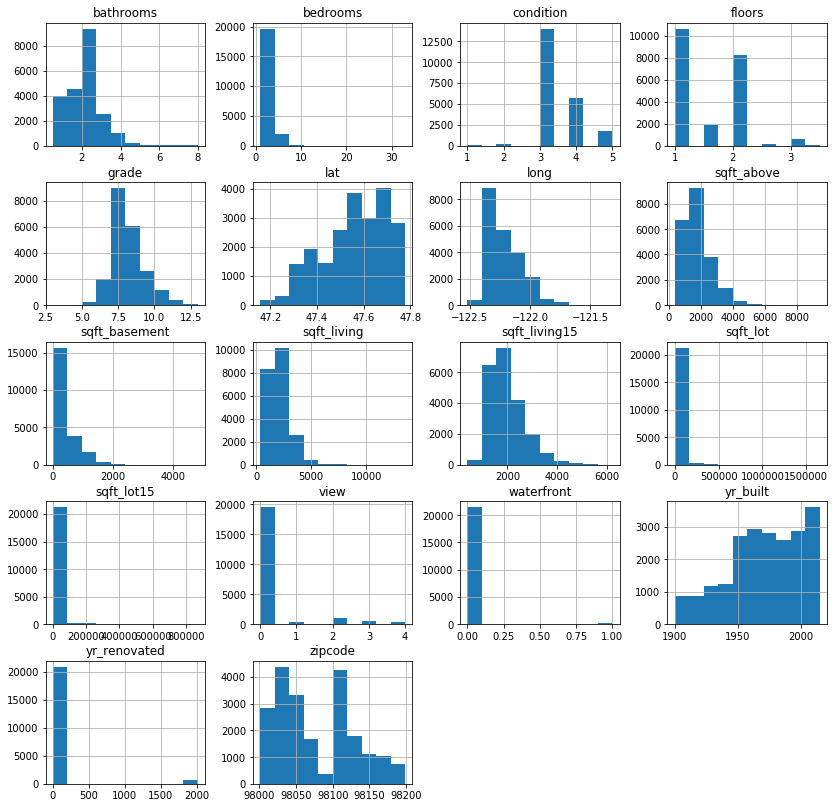

In [109]:
df[ind_cols].hist(figsize=(14,14));

The first thing we notice is that the yr_renovated is overwhelmingly 0 and yr_built is skewed. We should combine these two into a single continuous number. Next is to take note of the categorical variables: bedrooms, bathrooms, condition, floors, view, waterfront, and zipcode. All of these will need to be encoded before our final model fitting as well. The sqft variables and lat and long look continuous, but will need to be transformed to be more normally distributer.

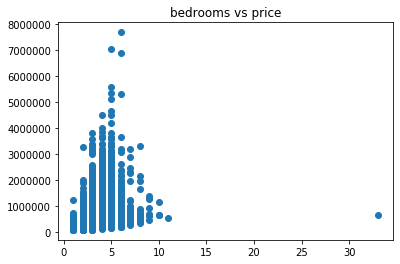

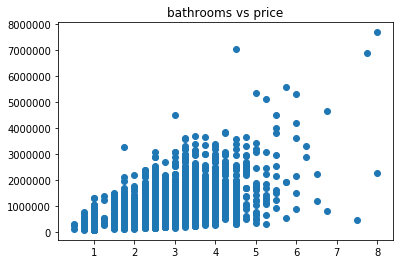

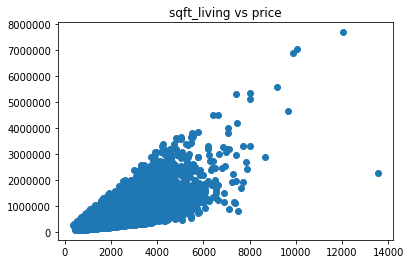

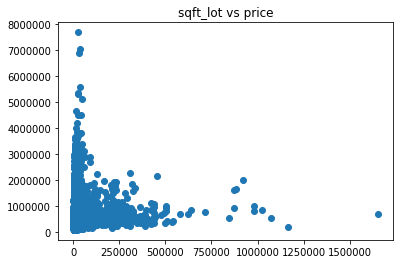

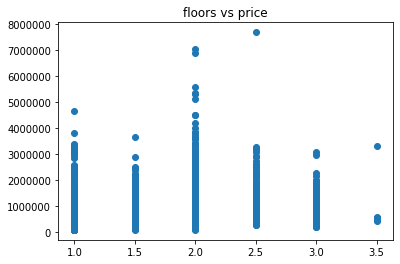

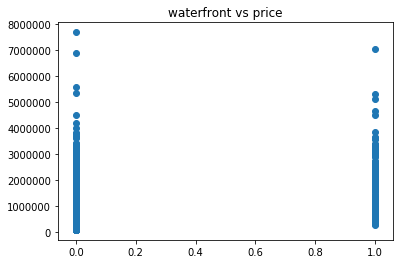

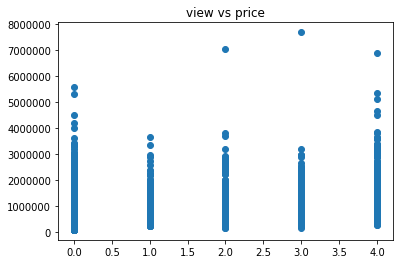

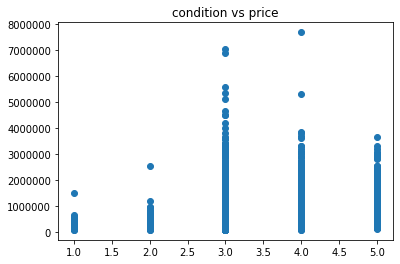

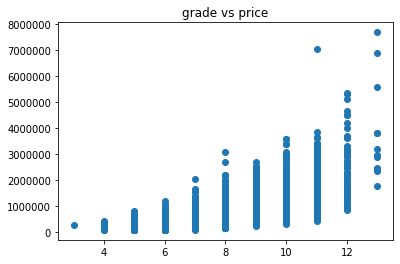

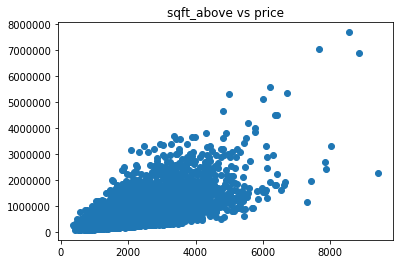

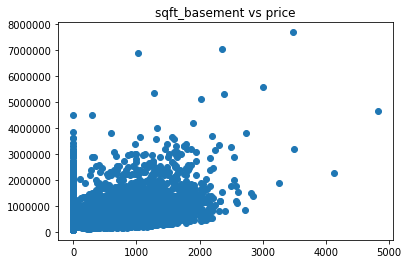

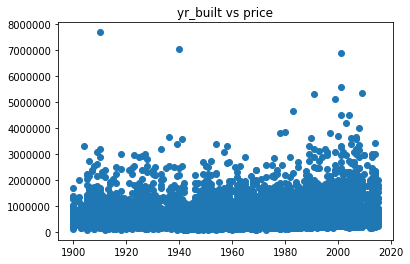

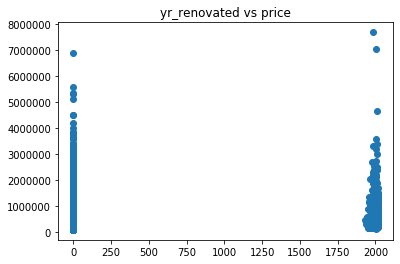

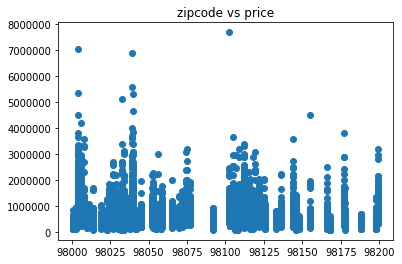

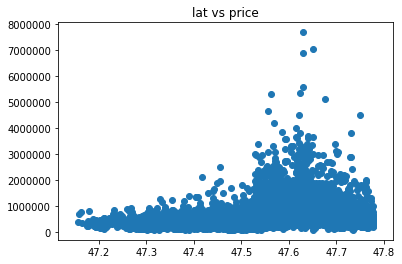

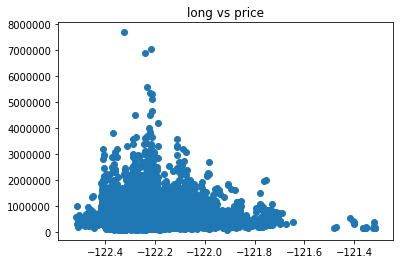

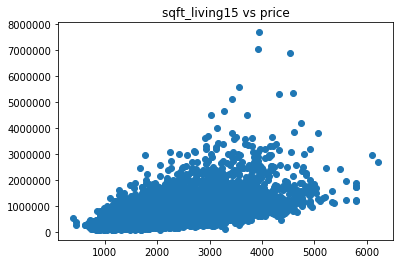

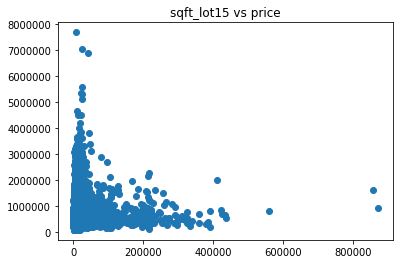

In [110]:
for variable in ind_cols:
    plt.scatter(x = df[variable], y = df['price'])
    plt.title('{} vs price'.format(variable))
    plt.show();

The scatter plots confirm our assumptions about which of the variables are categorical and which are continuous. One other observations are that the lot variables do not look like they have a linear relationship with price. The other obeservation of note is that sqft_living and sqft_lot look very similar to sqft_living15 and sqft_lot15. Selecting one set of those to avoid colinearity may be the best choice.

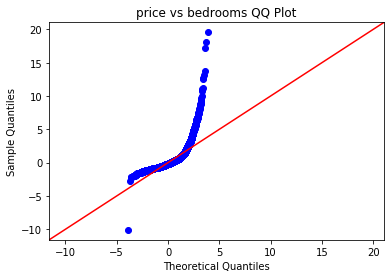

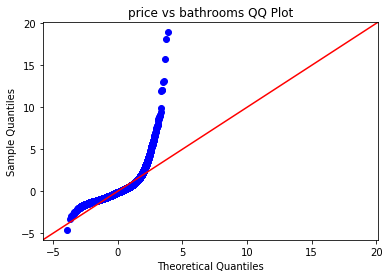

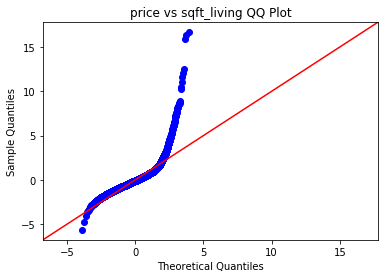

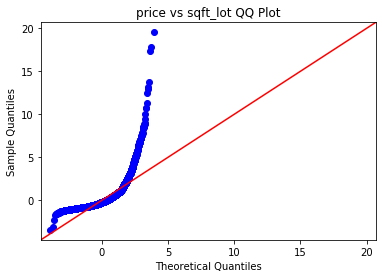

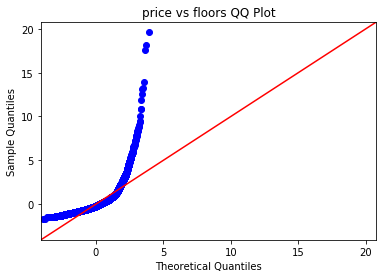

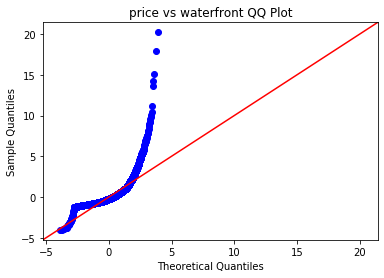

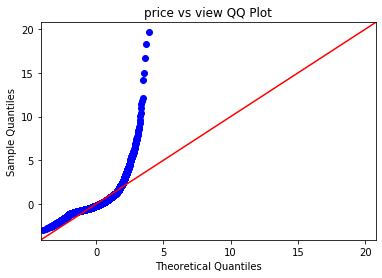

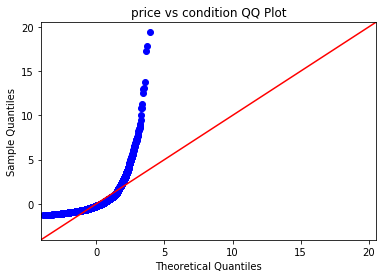

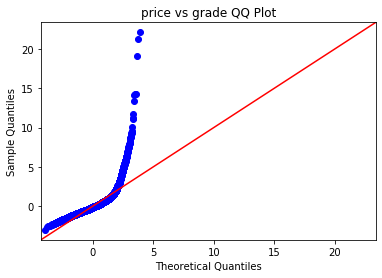

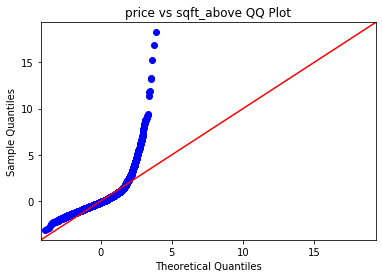

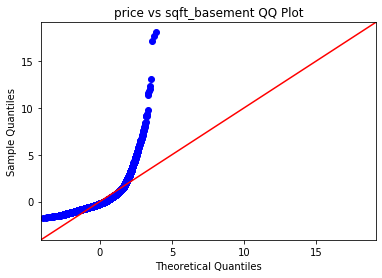

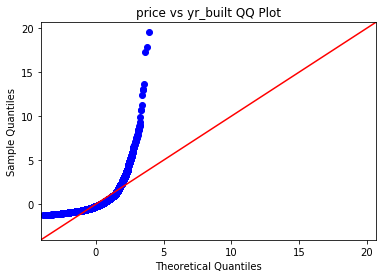

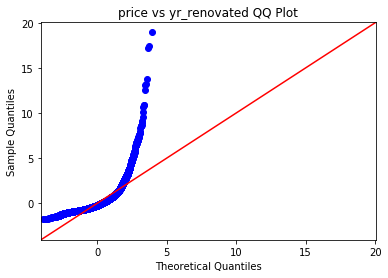

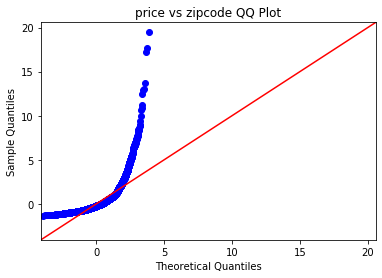

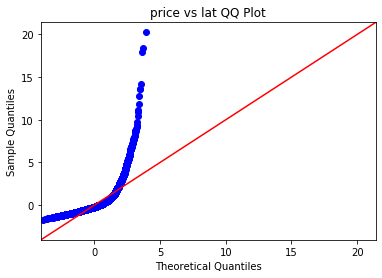

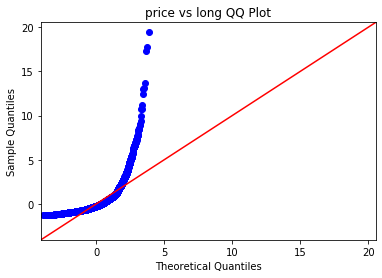

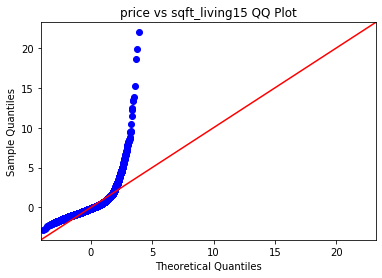

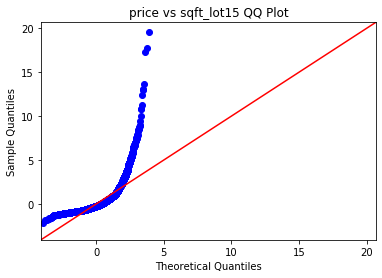

In [111]:
for variable in ind_cols:
    f = 'price~'+variable
    model = ols(formula=f, data=df).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    plt.title('price vs {} QQ Plot'.format(variable))
    plt.show()

The QQ plots are not fitted at all to the 45 line and turn upward. Transformations and outlier elimination will be needed.

## Box Plot

The next thing we are going to do is to look at the box plots for each variable to look for outliers in each of our dependent variables.

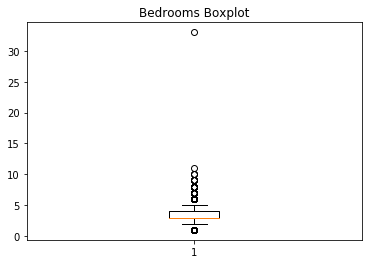

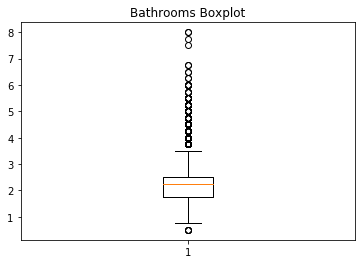

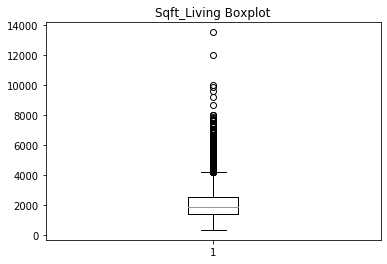

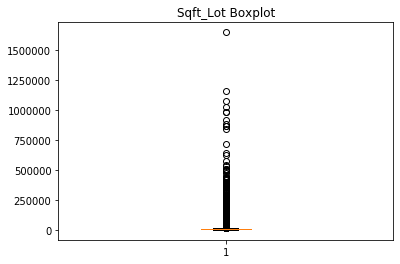

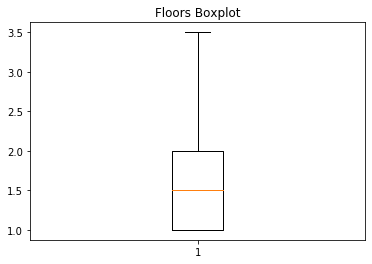

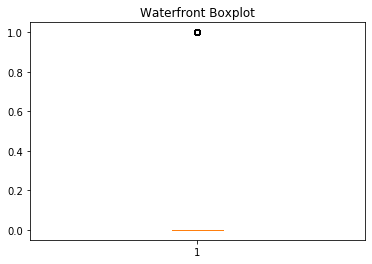

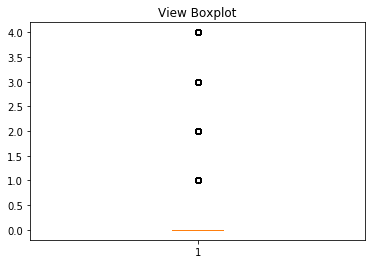

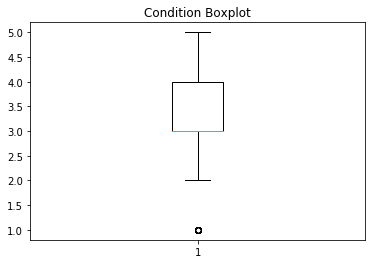

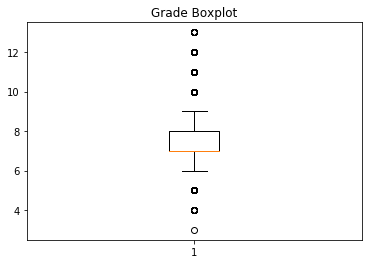

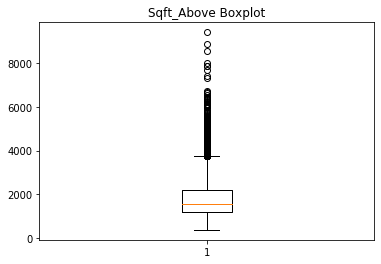

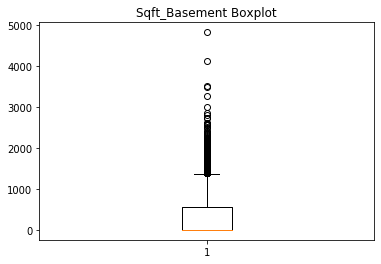

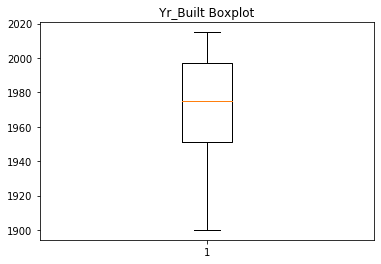

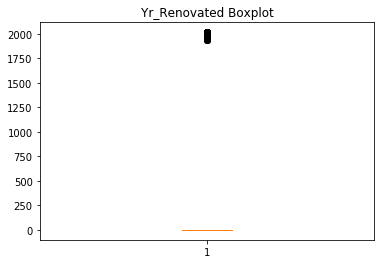

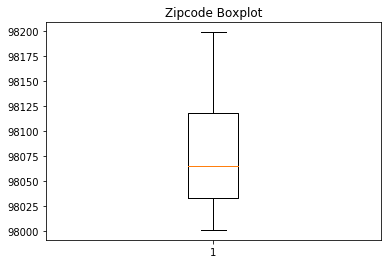

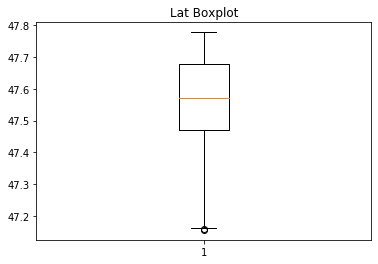

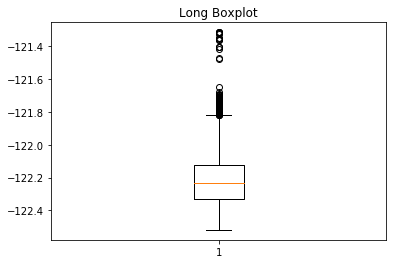

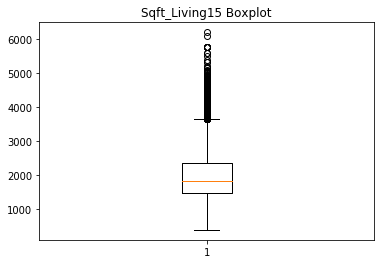

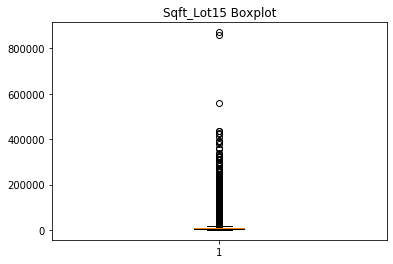

In [112]:
for variable in ind_cols:
    plt.boxplot(df[variable]);
    plt.title('{} Boxplot'.format(variable.title()))
    plt.show()

There are many outliers in our data, so we will next sort these out of our data to create a better fit for our model.

## Remove Outliers

We will start by creating our list of variables to check for the outliers. Because of the overwhelming value of 0 in the yr_renovated, waterfront, view, and other categorical variables, we will exclude them from our outlier removal. We will however include price in order to make sure there are no outlier values in listings that will increase the error on our model. Next, we'll calculate the upper and lower bounds for our outliers for each variable using the IQR and quartiles. These will be saved to a dictionary with the name of the variable.

In [113]:
outlier_data = []
for variable in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price', 'lat', 'long']:
    iqr = np.percentile(df[variable], 75) - np.percentile(df[variable], 25)
    top_bound = np.percentile(df[variable], 75) + 1.5 * iqr
    lower_bound = np.percentile(df[variable], 25) - 1.5 * iqr
    outlier_data.append({'name': variable, 'upper_bound': top_bound, 'lower_bound' : lower_bound})
outlier_data

[{'name': 'bedrooms', 'upper_bound': 5.5, 'lower_bound': 1.5},
 {'name': 'bathrooms', 'upper_bound': 3.625, 'lower_bound': 0.625},
 {'name': 'sqft_living', 'upper_bound': 4230.0, 'lower_bound': -250.0},
 {'name': 'sqft_lot', 'upper_bound': 19152.5, 'lower_bound': -3427.5},
 {'name': 'sqft_above', 'upper_bound': 3740.0, 'lower_bound': -340.0},
 {'name': 'sqft_basement', 'upper_bound': 1375.0, 'lower_bound': -825.0},
 {'name': 'sqft_living15', 'upper_bound': 3665.0, 'lower_bound': 185.0},
 {'name': 'sqft_lot15', 'upper_bound': 17557.5, 'lower_bound': -2374.5},
 {'name': 'price', 'upper_bound': 1129500.0, 'lower_bound': -162500.0},
 {'name': 'lat',
  'upper_bound': 47.98835000000001,
  'lower_bound': 47.16074999999999},
 {'name': 'long',
  'upper_bound': -121.82050000000001,
  'lower_bound': -122.63249999999996}]

In [114]:
for variable in outlier_data:
    df = df[df[variable['name']] <= variable['upper_bound']]
    df = df[df[variable['name']] >= variable['lower_bound']]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000


After we get filter out outliers using our upper and lower bounds for each variable, we are left with 16,999 out of the original 21,597 listings, which is still more than enough to continue forward with our analysis.

## Model Fit

Next let's do an initial baseline modeling to see how the model performs before we do any of our transformations on the data.

In [115]:
outcome = 'price'
predictors = '+'.join(ind_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     2060.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:52:09   Log-Likelihood:            -2.2139e+05
No. Observations:               16999   AIC:                         4.428e+05
Df Residuals:                   16980   BIC:                         4.430e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.58e+06   1.83e+06      0.864      0.387      -2e+06    5.16e+06
bedrooms      -9805.9630   1408.919     -6.960      0.000   -1.26e+04   -7044.336
bathrooms       1.75e+04   2212.728      7.908      0.000    1.32e+04    2.18e+04
sqft_living      82.8892     13.162      6.298      0.000      57.091     108.687
sqft_lot         -2.5090      0.526     -4.768      0.000      -3.541      -1.477
floors         1.197e+04   2533.534      4.724      0.000    7001.373    1.69e+04
waterfront     2.311e+05   2.67e+04      8.669      0.000    1.79e+05    2.83e+05
view           3.328e+04   1637.085     20.330      0.000    3.01e+04    3.65e+04
condition      2.773e+04   1459.338     18.999      0.000    2.49e+04    3.06e+04
grade          7.657e+04   1443.616     53.040      0.000    7.37e+04    7.94e+04
sqft_above        7.4675     13.120      0.569      0.569     -18.250      33.185
sqft_basement     0.0226     13.005      0.002      0.999     -25.468      25.513
yr_built      -1914.5426     45.526    -42.053      0.000   -2003.779   -1825.306
yr_renovated     18.8485      2.685      7.019      0.000      13.585      24.112
zipcode        -275.6458     20.522    -13.432      0.000    -315.871    -235.420
lat            5.474e+05   6591.921     83.038      0.000    5.34e+05     5.6e+05
long          -2.257e+04   9401.341     -2.400      0.016    -4.1e+04   -4139.200
sqft_living15    51.3146      2.601     19.727      0.000      46.216      56.413
sqft_lot15       -5.6311      0.594     -9.487      0.000      -6.795      -4.468
==============================================================================
Omnibus:                     1701.003   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3352.695
Skew:                           0.660   Prob(JB):                         0.00
Kurtosis:                       4.729   Cond. No.                     2.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unsurprisingly, our model is not performing well yet, with a low R-Squared value and very Jarque-Bera score.

## Log Transform Non Normal Distributions

Next, we'll do a log transformation on our continuous variables in order to make the distribution more normal.

In [116]:
non_normal_vars = ['sqft_lot15', 'sqft_living15', 'sqft_living', 'sqft_lot']

In [117]:
df[non_normal_vars] = np.log(df[non_normal_vars])

In [118]:
pt = PowerTransformer()
pt.fit(df[['long', 'lat']])
df[['long', 'lat']] = pt.transform(df[['long', 'lat']])

/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2832: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2828: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


In [131]:
df['long']

0       -0.160336
1       -0.686533
2        0.038212
3       -1.340439
4        1.499373
6       -0.755850
7       -0.651998
8       -0.842960
9        1.601792
11      -0.455002
13       1.499373
14      -1.349473
15      -1.178730
16       2.094302
17      -0.895475
18       0.225852
19      -0.574592
20      -0.877949
22       0.554050
23       0.577753
24       0.530306
25       0.160876
26      -1.045285
27      -0.643377
28      -0.557447
29       1.012531
30       1.314348
31      -1.018738
32      -1.116308
33      -1.178730
           ...   
21562   -0.480545
21563   -1.125210
21564    2.613885
21565    2.613885
21566   -1.178730
21567   -0.773231
21568   -1.259369
21569    1.425693
21570   -1.232441
21571   -0.600348
21572   -1.178730
21573    1.667184
21575    0.046423
21576   -0.921802
21578    1.035417
21579   -0.921802
21580    0.851182
21582   -0.218781
21585   -0.677892
21586    1.811254
21587    2.647251
21588   -0.421015
21589    0.569857
21590   -1.385665
21591   -1

## Transform Categorical Distributions

Next, we're going to transform the categorical variables using dummy variables to replace the original categorical. First, we'll set each categorical column to the data type category so that we can use pandas's build in .get_dummies() function to create our dummy variables and values. Then we'll concat them to the original dataframe and drop the orignal categorical columns.

In [120]:
#bathrooms, bedrooms, condition, floors, grade, view, zipcode, waterfront
df['bathrooms'] = df['bathrooms'].astype('category')
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bt', drop_first=True)

df['bedrooms'] = df['bedrooms'].astype('category')
bedrooms = pd.get_dummies(df['bedrooms'], prefix='br', drop_first=True)

df['condition'] = df['condition'].astype('category')
condition = pd.get_dummies(df['condition'], prefix='cd', drop_first=True)

df['floors'] = df['floors'].astype('category')
floors = pd.get_dummies(df['floors'], prefix='fl', drop_first=True)

df['grade'] = df['grade'].astype('category')
grade = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)

df['view'] = df['view'].astype('category')
view = pd.get_dummies(df['view'], prefix='vw', drop_first=True)

df['zipcode'] = df['zipcode'].astype('category')
zipcode = pd.get_dummies(df['zipcode'], prefix='zp', drop_first=True)

df['waterfront'] = df['waterfront'].astype('category')
waterfront = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)

In [121]:
df = pd.concat([df, bathrooms, bedrooms, condition, floors, grade, view, zipcode, waterfront], axis=1)

In [122]:
df.drop(['bathrooms','bedrooms','condition','floors','grade','view', 'zipcode', 'waterfront'],axis=1,inplace=True)
ind_cols.remove('bathrooms')
ind_cols.remove('bedrooms')
ind_cols.remove('condition')
ind_cols.remove('floors')
ind_cols.remove('grade')
ind_cols.remove('view')
ind_cols.remove('zipcode')
ind_cols.remove('waterfront')

## Years Since Construction Feature Generation

The final transformation we will do is to take those yr_built and yr_renovated columns and turn them into something more useable and continuous for our linear regression model. The way we'll do this is to create a new column called 'yr_since_const' that will take find the years since the house was either built or renovated. Then we can drop original yr_renovated and yr_built columns.

In [123]:
yrs_since_const = []
for index, value in enumerate(df['yr_built']):
    if value < df['yr_renovated'].iloc[index]:
        yrs_since_const.append(2019-df['yr_renovated'].iloc[index])
    else:
        yrs_since_const.append(2019-value)
yrs_since_const

[64,
 28.0,
 86,
 54,
 32,
 24,
 56,
 59,
 16,
 77,
 42,
 119,
 40,
 25,
 103,
 98,
 50,
 72,
 24,
 34,
 34,
 78,
 104,
 110,
 71,
 14,
 16,
 14,
 90,
 90,
 38,
 17.0,
 115,
 50,
 23,
 19,
 5,
 97,
 60,
 16,
 53,
 38,
 66,
 64,
 69,
 38,
 92,
 24,
 11,
 16,
 51,
 28,
 65,
 46,
 5,
 40,
 94,
 30,
 14,
 51,
 47,
 103,
 14,
 63,
 78,
 63,
 16,
 27,
 71,
 55,
 67,
 94,
 58,
 13,
 40,
 13,
 31,
 18,
 57,
 80,
 80,
 28.0,
 52,
 44,
 109,
 90,
 9.0,
 41,
 80,
 34,
 77,
 35,
 114,
 39,
 48,
 18,
 9,
 74,
 69,
 94,
 55,
 32,
 66,
 95,
 29,
 52,
 41,
 93,
 15,
 33,
 33,
 5,
 14,
 51,
 51,
 38,
 5,
 94,
 51,
 57,
 96,
 58,
 114,
 72,
 29,
 72,
 65,
 52,
 52,
 6.0,
 51,
 57,
 57,
 19,
 40,
 43,
 70,
 20,
 40,
 55,
 41,
 64,
 39,
 11,
 33,
 118,
 44,
 70,
 31,
 94,
 58,
 23,
 26,
 50,
 32,
 118,
 44,
 42,
 60,
 60,
 57,
 71,
 16,
 99,
 12,
 76,
 25,
 67,
 43,
 57,
 53,
 9,
 104,
 78,
 26,
 5,
 36,
 41,
 96,
 19,
 72,
 20,
 58,
 53,
 25,
 77,
 14,
 41,
 58,
 15,
 41.0,
 59,
 58,
 72,
 14.0,
 51,
 79

In [124]:
df['yrs_since_const'] = yrs_since_const
ind_cols.append('yrs_since_const')
ind_cols.remove('yr_built')
ind_cols.remove('yr_renovated')
df.drop(['yr_built','yr_renovated'],axis=1,inplace=True)

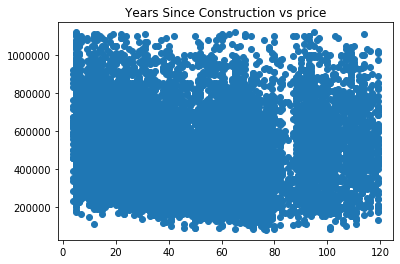

In [125]:
plt.scatter(x = df['yrs_since_const'], y = df['price'])
plt.title('Years Since Construction vs price')
plt.show();

The transformation was successful and the values are now a continuous variable to use in our model.

## Heat Map

Next, we're going to check for colinearity using a heatmap.

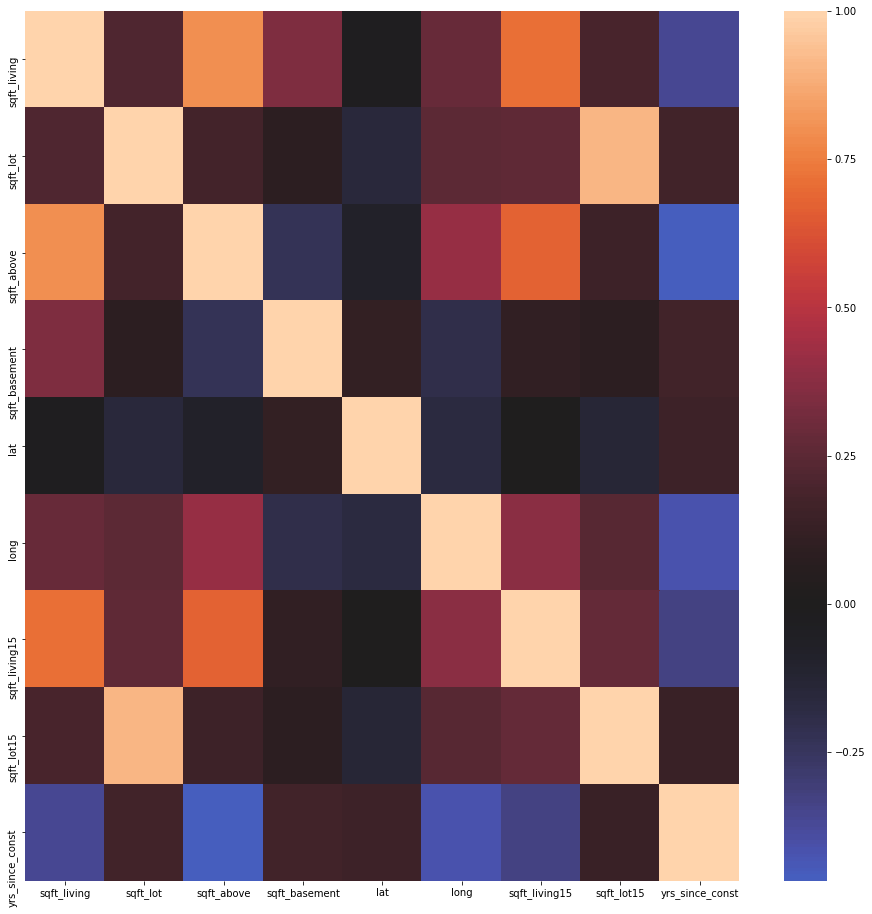

In [126]:
ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df[ind_cols].corr(), center=0);

There are three variables that look worrying: sqft_lot15, sqft_living15, and sqft_above. To confirm, we'll use a cutoff of .75 for correlation and look at which of these meet the threshold.

In [127]:
abs(df[ind_cols].corr()) > 0.75

,sqft_living,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,yrs_since_const
sqft_living,True,False,True,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,True,False
sqft_above,True,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False,False
lat,False,False,False,False,True,False,False,False,False
long,False,False,False,False,False,True,False,False,False
sqft_living15,False,False,False,False,False,False,True,False,False
sqft_lot15,False,True,False,False,False,False,False,True,False
yrs_since_const,False,False,False,False,False,False,False,False,True


So while sqft_above and sqft_lot15 were still above the threshold, sqft_living15 was below. Therefore, we will remove sqft_above and sqft_lot15.

## Removing Colinear Variables

Here we remove the colinear variables.

In [128]:
df.drop(['sqft_above', 'sqft_lot15'], axis=1, inplace=True)
ind_cols.remove('sqft_above')
ind_cols.remove('sqft_lot15')

## Fit Model

Finally, we'll use stepwise feature selection to select which features to keep and which ones to remove for our final model fitting. We'll use our premade stepwise function stepwise_selection for this.

In [129]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [130]:
ind_cols = list(df.columns)
ind_cols.remove('price')
ind_cols.remove('id')
ind_cols.remove('date')
result = stepwise_selection(df[ind_cols], df['price'])
print('resulting features:')
print(result)
print('Features Kept: ' + str(len(result)))
print('Features Removed: ' + str(len(ind_cols) - len(result)))

/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  sqft_living15                  with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  gr_9                           with p-value 8.10929e-179
Add  zp_98004                       with p-value 3.91864e-168
Add  yrs_since_const                with p-value 1.68632e-163
Add  sqft_lot                       with p-value 9.90589e-270
Add  gr_10                          with p-value 8.67536e-202
Add  gr_8                           with p-value 8.39345e-218
Add  zp_98040                       with p-value 5.91483e-142
Add  zp_98133                       with p-value 4.00066e-107
Add  zp_98155                       with p-value 1.79845e-132
Add  zp_98028                       with p-value 3.40984e-122
Add  zp_98011                       with p-value 2.63723e-90
Add  zp_98019                       with p-value 2.71886e-97
Add  zp_98034                       with p-value 2.65252e-120
Add  zp_98125                       w

/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zp_98199                       with p-value 5.0119e-45
Add  zp_98122                       with p-value 9.15839e-48
Add  zp_98005                       with p-value 4.38988e-42
Add  zp_98105                       with p-value 3.37335e-43
Add  zp_98027                       with p-value 4.579e-36
Add  zp_98168                       with p-value 1.29538e-35
Add  zp_98178                       with p-value 3.79322e-37
Add  zp_98077                       with p-value 4.96149e-33
Add  zp_98039                       with p-value 6.55113e-31
Add  zp_98029                       with p-value 3.99402e-27
Add  cd_4                           with p-value 2.9176e-27
Add  vw_1.0                         with p-value 9.18937e-27
Add  sqft_basement                  with p-value 4.50268e-27
Add  zp_98014                       with p-value 1.40805e-27
Add  zp_98022                       with p-value 5.19541e-24
Add  zp_98058                       with p-value 6.63971e-20
Add  zp_98052               

In [133]:
len(df.columns)

113

For our final model fitting, we'll use 82 of our features and get rid of 28.

## Train and Test Model

Next, we'll use scikit's linear regression function to train our model based on our selected features. Then, we'll test and use cross validation to test our final models to see the final error and r-squared scores for our fit model.

In [142]:
result_df = df[result]
X = result_df
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
linreg = LinearRegression()

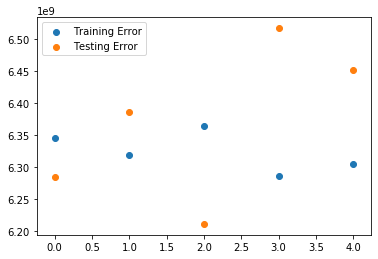

In [39]:
train_err = []
test_err = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(5)), train_err, label='Training Error')
plt.scatter(list(range(5)), test_err, label='Testing Error')
plt.legend();

Our error terms are not far off between the training and test sets in our cross validation sets. So our model doesn't look overfit.

In [40]:
cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
print('Mean Squared Error: ' + str(cv_5_results))

Mean Squared Error: -6465457982.660887


In [41]:
r2_score = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="r2"))
print('R-Squared Value: ' + str(r2_score))

R-Squared Value: 0.8302530538162284


Our R-Squared Value has significantly increased from initial fit, so our final model explains much more of the variance seen in price.

## Conclusion

   In conlusion, by following a standard data science life cycle of Cleaning, Exploration, Feature Generation, Predictive modeling, and Data Visualization, we were able to greatly increase the quality of our linear regression model to predict the price of a home. We eliminated outliers and filled empty data rows, transformed our non-normally distributed and categorical data, and even created our own feature for looking at the years since major construction. We also were clearly able to see how each of these steps increase the quality of our model between iterations. When we selected our final model, we had 82 features we used in our linear regression. One of the main variables we used was the square footage of the living space of the home. The larger the square footage of living space, the more expensive the home. Another variable was the location of the home by zipcode. Different zipcodes mean homes are in different areas. Areas that are closer to culture centers or downtown in a city instead of being further out in the suburbs affects the value of a home. The final feature was the grade of the home. Homes that are higher in quality and condition are going to be more valuable than homes of similar size in similar locations.

In [143]:
model = linreg.fit(X, y)

In [144]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
model.coef_

array([ 4.65127885e+04,  2.55601341e+04,  1.86409032e+05,  1.20979787e+05,
        4.67799668e+05,  1.66548433e+05,  4.13346479e+04,  3.82222032e+05,
        8.38991725e+04,  5.57445701e+04,  5.91146647e+04,  6.50147224e+04,
        1.85347062e+05,  4.04434980e+05,  2.28219121e+05,  6.17323623e+04,
        2.69202340e+05,  1.76716073e+05,  2.36073581e+05,  3.74050218e+05,
        2.48767427e+05,  9.86036343e+04,  3.83337662e+05,  3.83773833e+05,
        3.14697791e+05,  2.89766274e+05,  2.81465345e+05,  3.40965344e+05,
        1.97314872e+05,  5.87749677e+05,  1.86538990e+05,  1.41332557e+05,
        6.20163434e+04, -2.81246495e+01,  3.10269656e+04,  2.20707062e+05,
        2.89001272e+05,  1.72256627e+05,  2.88491362e+05,  2.72092249e+05,
        2.68225283e+05,  1.37757043e+05,  2.44755555e+05,  1.80800373e+05,
        1.90212218e+05,  1.99675574e+05,  5.18514111e+04,  1.99854019e+05,
       -3.08473399e+04,  2.89849203e+04,  6.73188307e+04,  1.22689181e+05,
        3.51628154e+04,  

In [149]:
column_dict = {}
for col in X.columns:
    column_dict[col] = col

In [150]:
column_dict

{'sqft_living15': 'sqft_living15',
 'lat': 'lat',
 'sqft_living': 'sqft_living',
 'gr_9': 'gr_9',
 'zp_98004': 'zp_98004',
 'gr_10': 'gr_10',
 'gr_8': 'gr_8',
 'zp_98040': 'zp_98040',
 'zp_98133': 'zp_98133',
 'zp_98155': 'zp_98155',
 'zp_98011': 'zp_98011',
 'zp_98072': 'zp_98072',
 'vw_4.0': 'vw_4.0',
 'zp_98112': 'zp_98112',
 'zp_98006': 'zp_98006',
 'vw_2.0': 'vw_2.0',
 'zp_98116': 'zp_98116',
 'cd_5': 'cd_5',
 'zp_98136': 'zp_98136',
 'zp_98119': 'zp_98119',
 'gr_11': 'gr_11',
 'vw_3.0': 'vw_3.0',
 'zp_98109': 'zp_98109',
 'zp_98102': 'zp_98102',
 'zp_98199': 'zp_98199',
 'zp_98122': 'zp_98122',
 'zp_98005': 'zp_98005',
 'zp_98105': 'zp_98105',
 'zp_98027': 'zp_98027',
 'zp_98039': 'zp_98039',
 'zp_98029': 'zp_98029',
 'cd_4': 'cd_4',
 'vw_1.0': 'vw_1.0',
 'sqft_basement': 'sqft_basement',
 'sqft_lot': 'sqft_lot',
 'zp_98144': 'zp_98144',
 'zp_98103': 'zp_98103',
 'zp_98126': 'zp_98126',
 'zp_98107': 'zp_98107',
 'zp_98115': 'zp_98115',
 'zp_98117': 'zp_98117',
 'zp_98118': 'zp_98

In [152]:
column_dict['bt_1.0'] = 'bt_1'
column_dict['vw_4.0'] = 'vw_4'
column_dict['vw_3.0'] = 'vw_3'
column_dict['vw_2.0'] = 'vw_2'
column_dict['vw_1.0'] = 'vw_1'
column_dict['bt_3.5'] = 'bt_35'
column_dict['wf_1.0'] = 'wf_1'
column_dict['fl_3.0'] = 'fl_3'
column_dict['bt_2.75'] = 'bt_275'
column_dict['bt_3.25'] = 'bt_325'
column_dict['fl_1.5'] = 'fl_15'
column_dict['bt_1.0'] = 'bt_1'
column_dict['bt_3.0'] = 'bt_3'
column_dict['bt_2.5'] = 'bt_25'

In [153]:
X.rename(columns=column_dict, inplace=True)

/Users/brendanfreeman/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,sqft_living15,lat,sqft_living,gr_9,zp_98004,gr_10,gr_8,zp_98040,zp_98019,vw_4,...,zp_98146,zp_98108,zp_98177,zp_98034,zp_98059,zp_98056,zp_98133,long,zp_98148,zp_98155
0,7.200425,47.5112,7.073270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.257,0,0
1,7.432484,47.7210,7.851661,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.319,0,0
2,7.908387,47.7379,6.646391,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.233,0,0
3,7.215240,47.5208,7.580700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.393,0,0
4,7.495542,47.6168,7.426549,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,-122.045,0,0
6,7.713338,47.3097,7.447168,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.327,0,0
7,7.408531,47.4095,6.966024,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.315,0,0
8,7.484369,47.5123,7.484369,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,-122.337,0,0
9,7.779049,47.3684,7.544332,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.031,0,0
11,7.192934,47.6900,7.056175,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-122.292,0,0


In [155]:
outcome = 'price'
predictors = '+'.join(list(X.columns))
formula = outcome + "~" + predictors
model = ols(formula=formula, data=result_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1039.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:38:47   Log-Likelihood:            -2.1595e+05
No. Observations:               16999   AIC:                         4.321e+05
Df Residuals:                   16916   BIC:                         4.327e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.85e+06   3.49e+04    -53.064      0.000   -1.92e+06   -1.78e+06
sqft_living15  4.651e+04   3532.122     13.169      0.000    3.96e+04    5.34e+04
lat            2.556e+04   1997.207     12.798      0.000    2.16e+04    2.95e+04
sqft_living    1.864e+05   3540.608     52.649      0.000    1.79e+05    1.93e+05
gr_9            1.21e+05   2784.762     43.443      0.000    1.16e+05    1.26e+05
zp_98004       4.678e+05   7607.939     61.488      0.000    4.53e+05    4.83e+05
gr_10          1.665e+05   4951.668     33.635      0.000    1.57e+05    1.76e+05
gr_8           4.133e+04   1727.143     23.932      0.000    3.79e+04    4.47e+04
zp_98040       3.822e+05   7594.379     50.330      0.000    3.67e+05    3.97e+05
zp_98133        8.39e+04   6487.694     12.932      0.000    7.12e+04    9.66e+04
zp_98155       5.574e+04   6945.980      8.025      0.000    4.21e+04    6.94e+04
zp_98011       5.911e+04   8320.008      7.105      0.000    4.28e+04    7.54e+04
zp_98072       6.501e+04   8791.851      7.395      0.000    4.78e+04    8.22e+04
vw_4           1.853e+05   1.12e+04     16.542      0.000    1.63e+05    2.07e+05
zp_98112       4.044e+05   7377.764     54.818      0.000     3.9e+05    4.19e+05
zp_98006       2.282e+05   5227.303     43.659      0.000    2.18e+05    2.38e+05
vw_2           6.173e+04   3487.848     17.699      0.000    5.49e+04    6.86e+04
zp_98116       2.692e+05   5531.330     48.669      0.000    2.58e+05     2.8e+05
cd_5           1.767e+05   1.96e+04      9.012      0.000    1.38e+05    2.15e+05
zp_98136       2.361e+05   5751.111     41.048      0.000    2.25e+05    2.47e+05
zp_98119       3.741e+05   7762.789     48.185      0.000    3.59e+05    3.89e+05
gr_11          2.488e+05   1.66e+04     14.987      0.000    2.16e+05    2.81e+05
vw_3            9.86e+04   5650.634     17.450      0.000    8.75e+04     1.1e+05
zp_98109       3.833e+05   9673.466     39.628      0.000    3.64e+05    4.02e+05
zp_98102       3.838e+05   9606.258     39.950      0.000    3.65e+05    4.03e+05
zp_98199       3.147e+05   6415.465     49.053      0.000    3.02e+05    3.27e+05
zp_98122       2.898e+05   6144.621     47.158      0.000    2.78e+05    3.02e+05
zp_98005       2.815e+05   8588.704     32.772      0.000    2.65e+05    2.98e+05
zp_98105        3.41e+05   7567.281     45.058      0.000    3.26e+05    3.56e+05
zp_98027       1.973e+05   5818.657     33.911      0.000    1.86e+05    2.09e+05
zp_98039       5.877e+05   3.28e+04     17.927      0.000    5.23e+05    6.52e+05
zp_98029       1.865e+05   5431.549     34.344      0.000    1.76e+05    1.97e+05
cd_4           1.413e+05   1.95e+04      7.242      0.000    1.03e+05     1.8e+05
vw_1           6.202e+04   5490.747     11.295      0.000    5.13e+04    7.28e+04
sqft_basement   -28.1246      2.177    -12.919   

In [154]:
result_df = pd.concat([result_df, y], axis=1)

In [85]:
result_df

,sqft_living15,lat,sqft_living,gr_9,zp_98004,gr_10,gr_8,zp_98040,zp_98019,vw_4,...,zp_98108,zp_98177,zp_98034,zp_98059,zp_98056,zp_98133,long,zp_98148,zp_98155,price
0,7.200425,47.5112,7.073270,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.257,0,0,221900.0
1,7.432484,47.7210,7.851661,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.319,0,0,538000.0
2,7.908387,47.7379,6.646391,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.233,0,0,180000.0
3,7.215240,47.5208,7.580700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.393,0,0,604000.0
4,7.495542,47.6168,7.426549,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-122.045,0,0,510000.0
6,7.713338,47.3097,7.447168,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.327,0,0,257500.0
7,7.408531,47.4095,6.966024,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.315,0,0,291850.0
8,7.484369,47.5123,7.484369,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.337,0,0,229500.0
9,7.779049,47.3684,7.544332,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.031,0,0,323000.0
11,7.192934,47.6900,7.056175,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-122.292,0,0,468000.0


In [220]:
model.params['wf_1']

199854.01912898401

In [163]:
zip_dict = {}
for param in model.params.index:
    if param.find('zp') != -1:
        zip_dict[param] = model.params[param]

In [164]:
zip_dict

{'zp_98004': 467799.66824890673,
 'zp_98040': 382222.0316585334,
 'zp_98133': 83899.17248366855,
 'zp_98155': 55744.57012380501,
 'zp_98011': 59114.66472593368,
 'zp_98072': 65014.72242290042,
 'zp_98112': 404434.98012249183,
 'zp_98006': 228219.1213578761,
 'zp_98116': 269202.3401432718,
 'zp_98136': 236073.58104754466,
 'zp_98119': 374050.2183486008,
 'zp_98109': 383337.66155669984,
 'zp_98102': 383773.8328017619,
 'zp_98199': 314697.7910610362,
 'zp_98122': 289766.2735966864,
 'zp_98005': 281465.3451964637,
 'zp_98105': 340965.344208058,
 'zp_98027': 197314.87218210904,
 'zp_98039': 587749.6772930077,
 'zp_98029': 186538.98971560335,
 'zp_98144': 220707.0623106191,
 'zp_98103': 289001.27224569255,
 'zp_98126': 172256.62691002493,
 'zp_98107': 288491.3620591649,
 'zp_98115': 272092.2486337565,
 'zp_98117': 268225.2829354458,
 'zp_98118': 137757.04300147752,
 'zp_98033': 244755.5551263424,
 'zp_98075': 180800.37286350643,
 'zp_98008': 190212.21832216522,
 'zp_98007': 199675.5736503937

In [169]:
zip_df = pd.DataFrame.from_dict(zip_dict, orient='index', columns=['Coefficient'])
zip_df

,Coefficient
zp_98004,467799.668249
zp_98040,382222.031659
zp_98133,83899.172484
zp_98155,55744.570124
zp_98011,59114.664726
zp_98072,65014.722423
zp_98112,404434.980122
zp_98006,228219.121358
zp_98116,269202.340143
zp_98136,236073.581048


In [189]:
zip_df.sort_values('Value Added ($)', ascending=False, inplace=True)

In [190]:
zip_df

,Value Added ($)
98039,587749.677293
98004,467799.668249
98112,404434.980122
98102,383773.832802
98109,383337.661557
98040,382222.031659
98119,374050.218349
98105,340965.344208
98199,314697.791061
98122,289766.273597


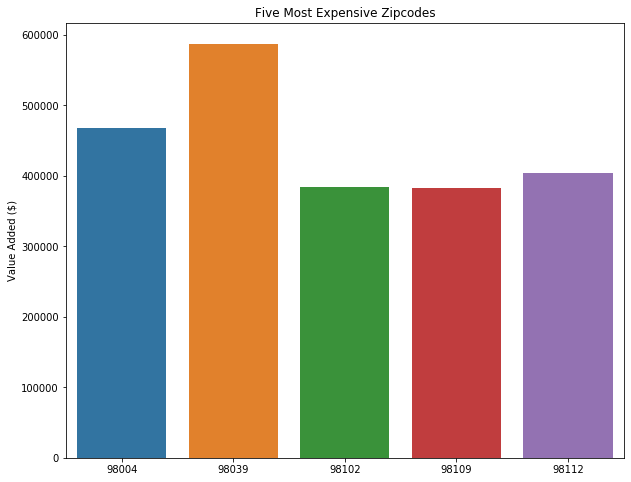

In [201]:
ax = plt.subplots(figsize=(10, 8))
plot = sns.barplot(x=zip_df.index[0:5], y=zip_df['Value Added ($)'][0:5]).set_title('Five Most Expensive Zipcodes')

In [180]:
zip_df.rename(columns={'Coefficient': 'Value Added ($)'}, inplace=True)

In [183]:
zip_index={}
for index in zip_df.index:
    zip_index[index] = index[3::]

In [184]:
zip_index

{'zp_98039': '98039',
 'zp_98004': '98004',
 'zp_98112': '98112',
 'zp_98102': '98102',
 'zp_98109': '98109',
 'zp_98040': '98040',
 'zp_98119': '98119',
 'zp_98105': '98105',
 'zp_98199': '98199',
 'zp_98122': '98122',
 'zp_98103': '98103',
 'zp_98107': '98107',
 'zp_98005': '98005',
 'zp_98115': '98115',
 'zp_98116': '98116',
 'zp_98117': '98117',
 'zp_98033': '98033',
 'zp_98136': '98136',
 'zp_98006': '98006',
 'zp_98144': '98144',
 'zp_98007': '98007',
 'zp_98027': '98027',
 'zp_98052': '98052',
 'zp_98008': '98008',
 'zp_98053': '98053',
 'zp_98029': '98029',
 'zp_98075': '98075',
 'zp_98126': '98126',
 'zp_98074': '98074',
 'zp_98118': '98118',
 'zp_98125': '98125',
 'zp_98177': '98177',
 'zp_98034': '98034',
 'zp_98065': '98065',
 'zp_98106': '98106',
 'zp_98108': '98108',
 'zp_98024': '98024',
 'zp_98133': '98133',
 'zp_98077': '98077',
 'zp_98146': '98146',
 'zp_98166': '98166',
 'zp_98010': '98010',
 'zp_98072': '98072',
 'zp_98059': '98059',
 'zp_98056': '98056',
 'zp_98011

In [185]:
zip_df.rename(index=zip_index, inplace=True)

In [192]:
zip_df.index

Index(['98039', '98004', '98112', '98102', '98109', '98040', '98119', '98105',
       '98199', '98122', '98103', '98107', '98005', '98115', '98116', '98117',
       '98033', '98136', '98006', '98144', '98007', '98027', '98052', '98008',
       '98053', '98029', '98075', '98126', '98074', '98118', '98125', '98177',
       '98034', '98065', '98106', '98108', '98024', '98133', '98077', '98146',
       '98166', '98010', '98072', '98059', '98056', '98011', '98155', '98028',
       '98148', '98178', '98038', '98055', '98023', '98092'],
      dtype='object')

In [216]:
cd_dict = {}
for param in model.params.index:
    if param.find('cd') != -1:
        cd_dict[param] = model.params[param]

In [217]:
cd_df = pd.DataFrame.from_dict(cd_dict, orient='index', columns=['Value Added ($)'])
cd_df.sort_values('Value Added ($)', ascending=False, inplace=True)

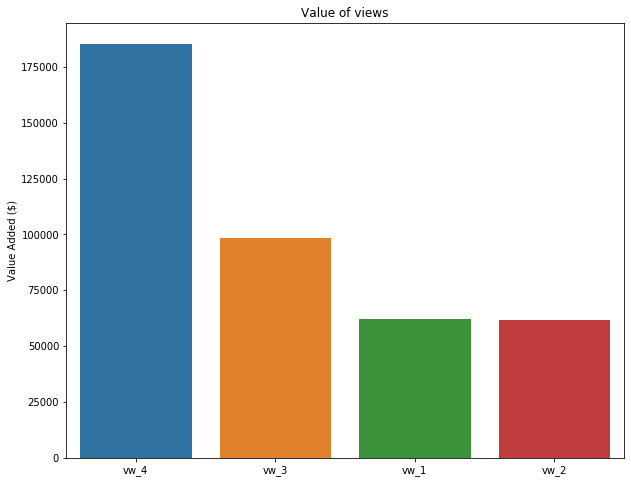

In [212]:
ax = plt.subplots(figsize=(10, 8))
plot = sns.barplot(x=vw_df.index, y=vw_df['Value Added ($)']).set_title('Value of views')

In [218]:
cd_df

,Value Added ($)
cd_5,176716.073347
cd_4,141332.557252
cd_3,122689.180595
cd_2,86884.565549
